In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_excel('/content/drive/MyDrive/Copy of HomeTest 1 - KPMG Data.xlsx', sheet_name='Transactions')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [ ]:
# select necessary colomns
df = df[['customer_id', 'transaction_date', 'order_status']]
df

,customer_id,transaction_date,order_status
0,2950,2017-02-25,Approved
1,3120,2017-05-21,Approved
2,402,2017-10-16,Approved
3,3135,2017-08-31,Approved
4,787,2017-10-01,Approved
...,...,...,...
19995,1018,2017-06-24,Approved
19996,127,2017-11-09,Approved
19997,2284,2017-04-14,Approved
19998,2764,2017-07-03,Approved


In [ ]:
# filter 'order_status' == 'Approved' and rows are not duplicated
df = df[df['order_status'] == 'Approved']
df = df[~df.duplicated()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19694 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       19694 non-null  int64         
 1   transaction_date  19694 non-null  datetime64[ns]
 2   order_status      19694 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 615.4+ KB


In [ ]:
# create transaction_month
import datetime as dt

def get_month(x):
  return dt.datetime(x.year, x.month, 1)

df['transaction_month'] = df['transaction_date'].apply(get_month)

df

,customer_id,transaction_date,order_status,transaction_month
0,2950,2017-02-25,Approved,2017-02-01
1,3120,2017-05-21,Approved,2017-05-01
2,402,2017-10-16,Approved,2017-10-01
3,3135,2017-08-31,Approved,2017-08-01
4,787,2017-10-01,Approved,2017-10-01
...,...,...,...,...
19995,1018,2017-06-24,Approved,2017-06-01
19996,127,2017-11-09,Approved,2017-11-01
19997,2284,2017-04-14,Approved,2017-04-01
19998,2764,2017-07-03,Approved,2017-07-01


In [ ]:
# Create cohort_month (each customer's earliest month of making transaction)
df['cohort_month'] = df.groupby('customer_id')['transaction_month'].transform('min')
df

,customer_id,transaction_date,order_status,transaction_month,cohort_month
0,2950,2017-02-25,Approved,2017-02-01,2017-02-01
1,3120,2017-05-21,Approved,2017-05-01,2017-01-01
2,402,2017-10-16,Approved,2017-10-01,2017-01-01
3,3135,2017-08-31,Approved,2017-08-01,2017-02-01
4,787,2017-10-01,Approved,2017-10-01,2017-01-01
...,...,...,...,...,...
19995,1018,2017-06-24,Approved,2017-06-01,2017-01-01
19996,127,2017-11-09,Approved,2017-11-01,2017-01-01
19997,2284,2017-04-14,Approved,2017-04-01,2017-04-01
19998,2764,2017-07-03,Approved,2017-07-01,2017-02-01


In [ ]:
# create cohort_index (Difference between current month and first month in which transaction is made)

def get_date_int(dframe, column):
  year = dframe[column].dt.year
  month = dframe[column].dt.month
  day = dframe[column].dt.day
  return year, month, day


transaction_year, transaction_month, transaction_day = get_date_int(df, 'transaction_date')
cohort_year, cohort_month, cohort_day = get_date_int(df, 'cohort_month')

years_diff = transaction_year - cohort_year

months_diff = transaction_month - cohort_month

df['cohort_index'] = years_diff * 12 + months_diff + 1

df

,customer_id,transaction_date,order_status,transaction_month,cohort_month,cohort_index
0,2950,2017-02-25,Approved,2017-02-01,2017-02-01,1
1,3120,2017-05-21,Approved,2017-05-01,2017-01-01,5
2,402,2017-10-16,Approved,2017-10-01,2017-01-01,10
3,3135,2017-08-31,Approved,2017-08-01,2017-02-01,7
4,787,2017-10-01,Approved,2017-10-01,2017-01-01,10
...,...,...,...,...,...,...
19995,1018,2017-06-24,Approved,2017-06-01,2017-01-01,6
19996,127,2017-11-09,Approved,2017-11-01,2017-01-01,11
19997,2284,2017-04-14,Approved,2017-04-01,2017-04-01,1
19998,2764,2017-07-03,Approved,2017-07-01,2017-02-01,6


In [ ]:
# group customer_id by cohort_month, cohort_index
cohort_data = df.groupby(['cohort_month', 'cohort_index'])['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

# cohort pivot_table
cohort_counts = cohort_data.pivot_table(index='cohort_month', columns='cohort_index', values='customer_id')

cohort_counts

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01-01,1347.0,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
2017-02-01,800.0,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
2017-03-01,484.0,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
2017-04-01,337.0,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
2017-05-01,213.0,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
2017-06-01,123.0,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,24.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# calculate retention rate per month index
cohort_size = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_size, axis = 0)
retention = retention.round(3)*100

retention.index = retention.index.strftime('%Y-%m')

retention

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01,100.0,35.9,37.5,37.0,36.5,35.3,38.1,38.9,36.3,38.9,36.5,37.9
2017-02,100.0,40.2,37.1,38.9,35.4,37.1,38.2,35.1,40.6,38.2,36.5,NaN
2017-03,100.0,34.5,35.5,33.9,37.2,38.0,35.7,43.2,38.4,37.2,NaN,NaN
2017-04,100.0,32.6,35.9,45.1,42.1,35.0,42.7,37.1,38.3,NaN,NaN,NaN
2017-05,100.0,40.4,39.0,41.3,34.3,34.3,34.7,39.0,NaN,NaN,NaN,NaN
2017-06,100.0,36.6,35.8,38.2,36.6,36.6,43.9,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.8,33.8,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,35.3,43.1,35.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,33.3,29.2,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


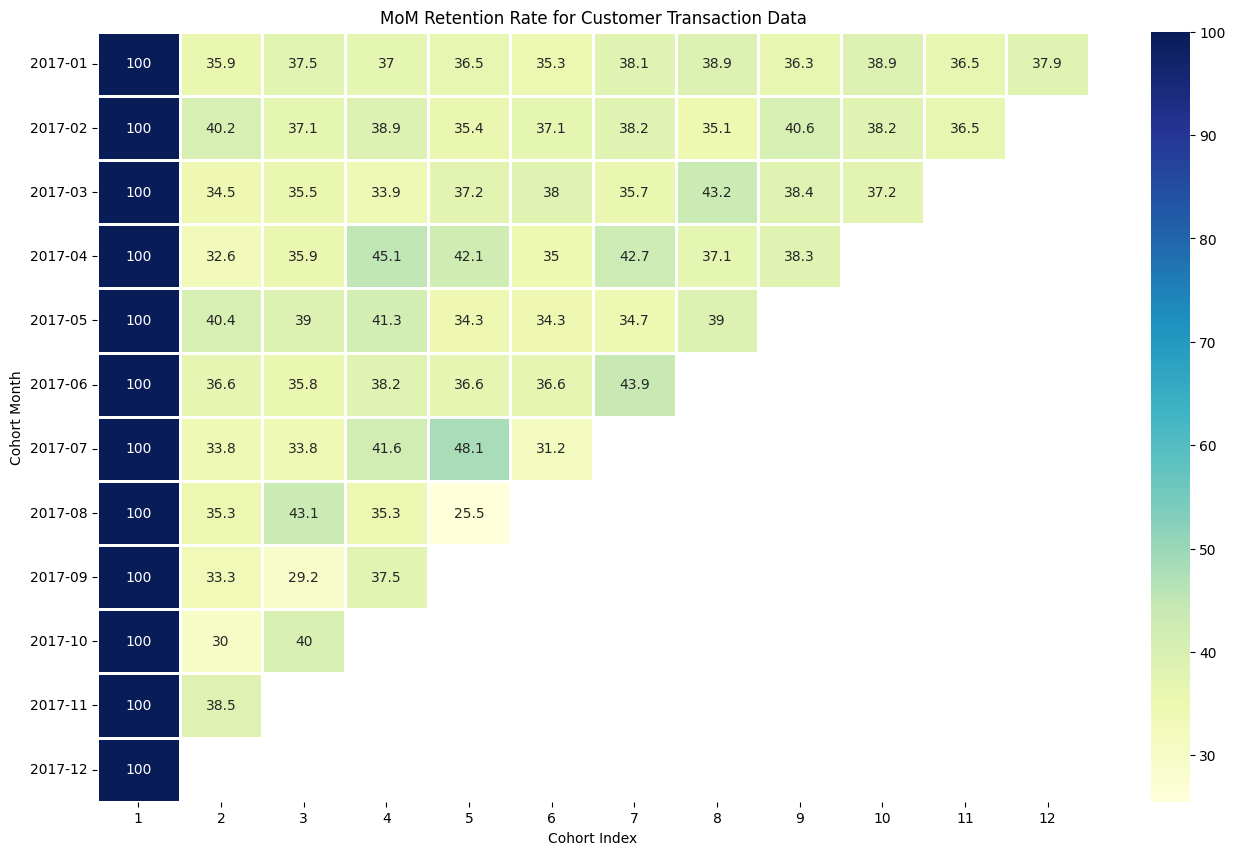

In [ ]:
# plotting heatmap for retention table
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (16, 10))

plt.title("MoM Retention Rate for Customer Transaction Data")

sns.heatmap(retention, annot = True, cmap="YlGnBu", fmt='g', linewidth=1)

plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.yticks(rotation = 360)

plt.show()